In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

datapath = '../Datasets/curve80.txt'

In [8]:
# Build the graph
def build_graph(n_weights):
    x = tf.placeholder('float', [None, n_weights], name='x')
    y = tf.placeholder('float', [None,], name='y')
    
    w = tf.Variable(np.ones(n_weights), dtype='float', name='w')
    
    y_model = tf.reduce_sum(tf.mul(w, x, name='wx'), 1, name='sum_wx')
    error = tf.reduce_mean(tf.square(tf.sub(y_model, y, name='y_model-y'), name='squared_error'), name='mse')
    
    train_step = tf.train.GradientDescentOptimizer(0.01, name='gradient_descent').minimize(error)
    
    return (x, y, w, train_step)

In [9]:
# Convert vector of x values to polynomial space
def polynomialize(x, degree):
    n_points = len(x)
    x_poly = x[:, np.newaxis]
    
    for d in xrange(1, degree):
        x_poly = np.append(x_poly, np.power(x, d+1)[:, np.newaxis], 1)
    
    mu = np.mean(x_poly, axis=0)
    scale = 1.0 / np.sqrt(np.var(x_poly, axis=0))
    
    x_poly -= mu
    x_poly *= scale
    
    return np.append(np.ones(n_points)[:, np.newaxis], x_poly, 1)

In [10]:
def predict(w, x):
    return np.sum(w*x, axis=1)

In [11]:
def mse(y, y_pred):
    return np.mean(np.square(y - y_pred))

[ 1.89802349  0.51924682  3.87399602 -2.66133714]


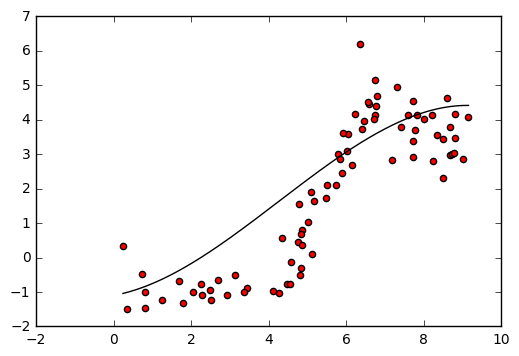

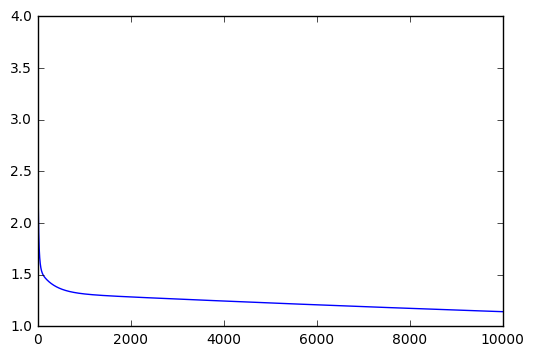

In [12]:
# Read in and prepare data
data = np.loadtxt(datapath)
x_data = data[:, 0]
y_data = data[:, 1]

degree = 3
max_iter = 10000

x_train = polynomialize(x_data, degree)
y_train = y_data

# Run the graph and finish training
x, y, w, train_step = build_graph(degree+1)
error = []

with tf.Session() as session:
    tf.train.SummaryWriter('linear_regression_logs', session.graph)
    session.run(tf.initialize_all_variables())
    
    for i in xrange(max_iter):
        session.run(train_step, feed_dict={x : x_train, y : y_train})
        weights = session.run(w)
        error += [mse(y_train, predict(weights, x_train))]
    
print weights

xs = np.linspace(np.min(x_data), np.max(x_data), 200)
ys = predict(weights, polynomialize(xs, degree))

plt.scatter(x_data, y_data, marker='o', c='r')
plt.plot(xs, ys, c='k')
plt.show()

plt.plot(range(max_iter), error)
plt.show()